In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

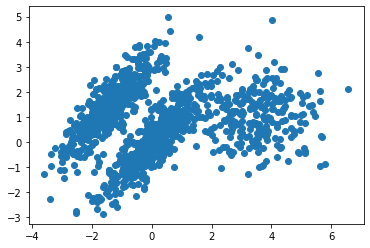

In [3]:
plt.scatter(*X.T)

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [6]:
gm.weights_

array([0.20925194, 0.40009697, 0.39065109])

In [7]:
gm.means_

array([[ 3.40241777,  1.05702687],
       [-1.40745226,  1.42727761],
       [ 0.05292802,  0.07720061]])

In [8]:
gm.covariances_

array([[[ 1.14357415, -0.02922398],
        [-0.02922398,  0.95297095]],

       [[ 0.63518782,  0.7300408 ],
        [ 0.7300408 ,  1.16123726]],

       [[ 0.69052478,  0.79895376],
        [ 0.79895376,  1.21568342]]])

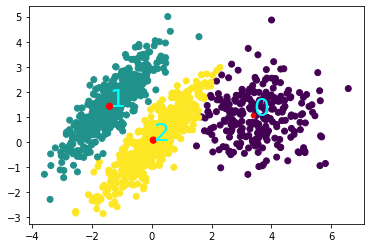

In [9]:
plt.scatter(*X.T, c = gm.predict(X))
plt.scatter(*gm.means_.T, color = 'red', s = 100*gm.weights_)
for i, j in enumerate(gm.means_):
    plt.text(gm.means_[i, 0], gm.means_[i, 1], str(i), fontsize = 25, 
            color = 'cyan')

In [10]:
gm.converged_

True

In [11]:
gm.n_iter_

6

In [12]:
gm.predict([[1, 0.1], [3, 4], [0, 10]])

array([2, 0, 0], dtype=int64)

In [13]:
gm.predict_proba([[1, 0.1], [3, 4], [0, 10]])

array([[1.28856942e-01, 6.42178557e-13, 8.71143058e-01],
       [6.64828587e-01, 4.26377829e-09, 3.35171408e-01],
       [1.00000000e+00, 2.80043151e-13, 2.55553663e-54]])

In [14]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 200),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = gm.predict(X_new).reshape(x0.shape)

In [15]:
X_new, y_new = gm.sample(10)

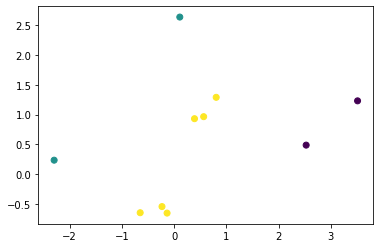

In [16]:
plt.scatter(*X_new.T, c = y_new)

In [17]:
X_new, y_new = gm.sample(1)

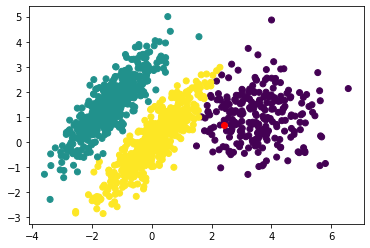

In [18]:
plt.scatter(*X.T, c = gm.predict(X))
plt.scatter(*X_new.T, color = 'red')

In [19]:
np.exp(gm.score_samples(X_new))

array([0.01925722])

In [20]:
np.exp(gm.score_samples([[-4, 5]]))

array([7.68691829e-16])

In [21]:
x0, x1 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 1000),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

score_sample = gm.score_samples(X_new).reshape(x0.shape)
y_pred = gm.predict(X_new).reshape(x0.shape)

[-3.5830831590015757,
 6.5696831854024875,
 -2.848604775181289,
 5.002442565070353]

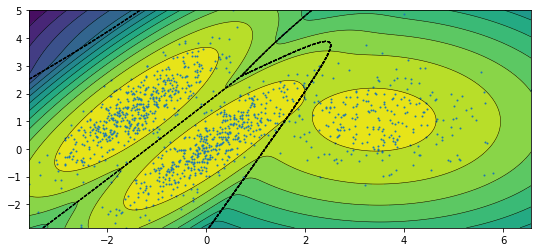

In [22]:
plt.figure(figsize = (9, 4))
plt.contourf(x0, x1, score_sample,
            levels = np.linspace(score_sample.min(), score_sample.max(), 15))
plt.contour(x0, x1, score_sample, colors = 'k', linewidths = 0.5,
           levels = np.linspace(score_sample.min(), score_sample.max(), 15),
           linestyles = 'solid')

plt.contour(x0, x1, y_pred, colors = 'k', linestyles = 'dashed',
           linewidths = 1)
plt.scatter(*X.T, s = 1)
plt.axis([X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()])

## Anomaly Detection using Gaussian Mixtures

In [23]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [24]:
mins = X.min(axis = 0)
maxs = X.max(axis = 0)

x0, x1 = np.meshgrid(
    np.linspace(mins[0], maxs[0], 1000),
    np.linspace(mins[1], maxs[1], 1000)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = gm.predict(X_new).reshape(x0.shape)
score_samples = gm.score_samples(X_new).reshape(x0.shape)

[-3.5830831590015757,
 6.5696831854024875,
 -2.848604775181289,
 5.002442565070353]

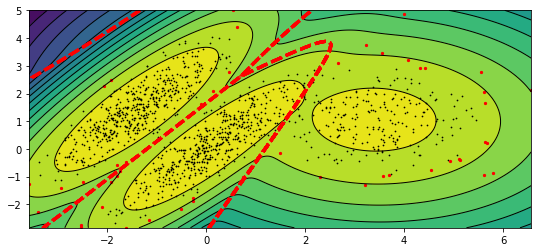

In [25]:
plt.figure(figsize = (9, 4))
plt.contourf(x0, x1, score_samples,
            levels = np.linspace(score_samples.min(), score_samples.max(), 15))
plt.contour(x0, x1, score_samples,
           levels = np.linspace(score_samples.min(), score_samples.max(), 15),
           linewidths = 1, linestyles = 'solid', colors = 'k')
plt.contour(x0, x1, y_pred, linestyles = 'dashed', colors = 'red',
           linewidths = 3)
plt.scatter(*X.T, color = 'k', s = 0.5)
plt.scatter(*anomalies.T, s = 5, color = 'red')
plt.axis([mins[0], maxs[0], mins[1], maxs[1]])

In [26]:
from IPython.display import clear_output

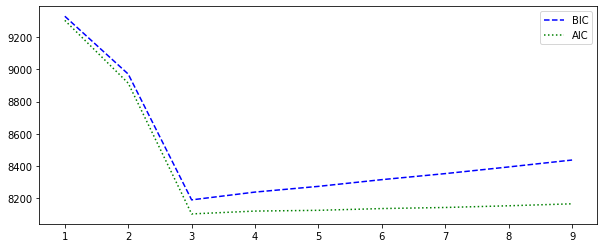

In [27]:
n_clusters = []
bic_cost = []
aic_cost = []

for k in range(1, 10):
    clear_output(wait = True)
    tmp_gm = GaussianMixture(n_components = k)
    tmp_gm.fit(X)
    
    n_clusters.append(k)
    bic_cost.append(tmp_gm.bic(X))
    aic_cost.append(tmp_gm.aic(X))
    
    plt.figure(figsize = (10, 4))
    plt.plot(n_clusters, bic_cost, 'b--', label = 'BIC')
    plt.plot(n_clusters, aic_cost, 'g:', label = 'AIC')
    plt.legend()
    plt.show()

In [28]:
from sklearn.mixture import BayesianGaussianMixture

In [29]:
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10, random_state = 42)
bgm.fit(X)

C:\Users\subho\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:267: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [30]:
bgm.converged_

False

In [31]:
bgm.n_iter_

100

In [32]:
bgm = BayesianGaussianMixture(n_components = 3, n_init = 20, random_state = 42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=3, n_init=20,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [33]:
bgm.converged_

True

In [34]:
bgm.n_iter_

14

In [35]:
w = bgm.weights_
print(w)
print(w.mean())

[0.40103032 0.39459729 0.20437239]
0.3333333333333333


In [36]:
w = gm.weights_
print(w)
print(w.mean())

[0.20925194 0.40009697 0.39065109]
0.3333333333333334


In [37]:
bgm = BayesianGaussianMixture(n_components = 10, n_init = 20, random_state = 42)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=20,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [38]:
bgm.converged_

True

In [39]:
bgm.n_iter_

72

In [40]:
w = bgm.weights_
print(np.round(w, 3))
print(w.mean())

[0.001 0.395 0.205 0.399 0.    0.    0.    0.    0.    0.   ]
0.1


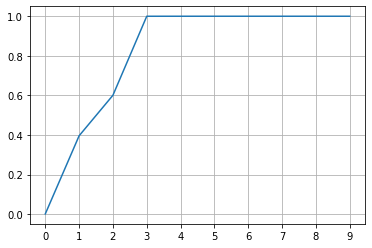

In [41]:
plt.plot(np.arange(len(w)), np.cumsum(w))
plt.xticks(np.arange(len(w)))
plt.grid(True)

In [42]:
from sklearn.datasets import make_moons

In [48]:
X, y = make_moons(n_samples = 1000, noise = 0.1)

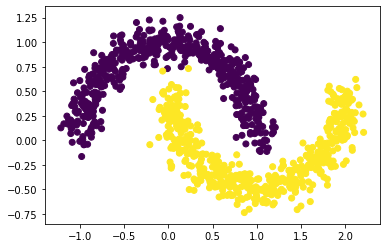

In [49]:
plt.scatter(*X.T, c = y)

In [72]:
bgm = BayesianGaussianMixture(n_components = 20, n_init = 20)
bgm.fit(X)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=20, n_init=20,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [73]:
bgm.converged_

True

In [74]:
bgm.n_iter_

77

In [75]:
np.round(bgm.weights_, 3)

array([0.186, 0.173, 0.178, 0.001, 0.187, 0.001, 0.152, 0.001, 0.122,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [76]:
mins = X.min(axis = 0)
maxs = X.max(axis = 0)

x0, x1 = np.meshgrid(
    np.linspace(mins[0], maxs[0], 1000),
    np.linspace(mins[1], maxs[1], 1000)
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_pred = bgm.predict(X_new).reshape(x0.shape)
score_samples = bgm.score_samples(X_new).reshape(x0.shape)

score_min = score_samples.min()
score_max = score_samples.max()

[-1.2193997045241616,
 2.2109881119720582,
 -0.738271566232428,
 1.2506007965103292]

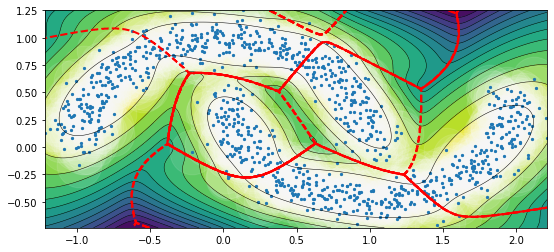

In [107]:
plt.figure(figsize = (9, 4))
plt.contourf(x0, x1, score_samples, levels = np.linspace(score_min, score_max, 15)),
plt.contour(x0, x1, score_samples, levels = np.linspace(score_min, score_max, 15),
           linewidths = 0.5, linestyles = 'solid', colors = 'k')
plt.contour(x0, x1, y_pred, linewidths = 2, linestyles = 'dashed', colors = 'r')
plt.scatter(*X.T, s = 2000, alpha = 0.1, color = 'white')
plt.scatter(*X.T, s = 5)
plt.axis([mins[0], maxs[0], mins[1], maxs[1]])